## Libraries

In [2]:
%load_ext autoreload
%autoreload 2

#general
import gym
import os
import importlib
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from baselines
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
#from stable_baselines3.common.env_checker import check_env

#local
from envs.rendezvous import Poliastro_env
from envs.env_test import play_game, play_game_train


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
env=Poliastro_env(render_mode=None,
                  distance="non-euclidean",
                  #fuel=fuel
                 )

/home/lucas/anaconda3/envs/rl/lib/python3.10/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float16
  logger.warn(


## non-train evironment

In [4]:
mean_no_trained,scores_no_trained=play_game(10,env)

Progress…: 100%|████████████████████████████████| 10/10 [00:14<00:00,  1.48s/it]


In [57]:
env.close()

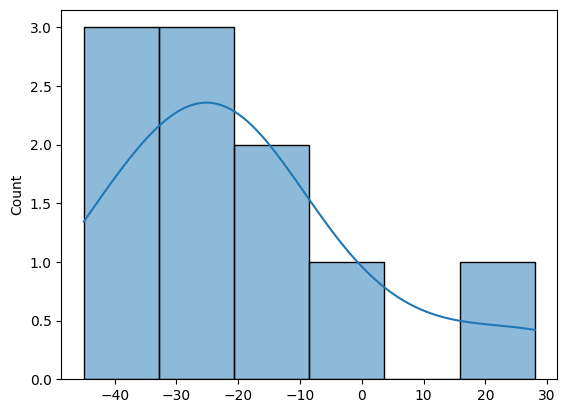

In [5]:
sns.histplot(scores_no_trained,kde=True);

# ML model

In [59]:
log_path=os.path.join("logs","model_dist_3")

In [60]:
env_dummy=DummyVecEnv([lambda: env])
model=PPO("MultiInputPolicy", env_dummy, verbose=0,tensorboard_log=log_path)
model.learn(total_timesteps=50000)

error: font not initialized

### saving the model

In [74]:
log_path_model=os.path.join("models","non-ecu2-1k-fuel-40k-steps")
model.save(log_path_model)

In [ ]:
#model=PPO.load(log_path2,env=env)

### testing model

In [61]:
env=Poliastro_env(render_mode="human",
                  distance="non-euclidean",
                  #fuel=fuel
                 )

/home/lucas/anaconda3/envs/rl/lib/python3.10/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float16
  logger.warn(


In [62]:
mean_trained, list_trained=play_game_train(10, env, model)

Progress…: 100%|████████████████████████████████| 10/10 [08:32<00:00, 51.25s/it]


In [63]:
print(f"no trained mean:{mean_no_trained}, model PPO mean: {mean_trained}")

no trained mean:-5.5, model PPO mean: 18.6


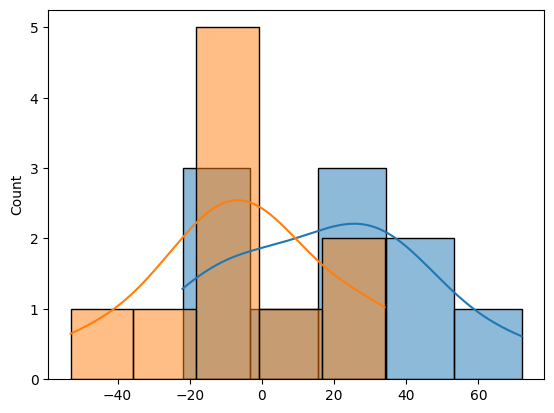

In [64]:
sns.histplot(list_trained, kde=True);
sns.histplot(scores_no_trained,kde=True);

# Evaluation

In [38]:
training_log_path=os.path.join("logs")

In [40]:
!tensorboard --logdir={training_log_path}

TensorFlow installation not found - running with reduced feature set.

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.10.1 at http://localhost:6006/ (Press CTRL+C to quit)
^C
